In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']


In [14]:
import sklearn 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model



In [15]:
df = pd.read_csv("../input/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
print(df.isnull().sum().sum())
print(df.size)
print(df.shape)

0
4500
(500, 9)


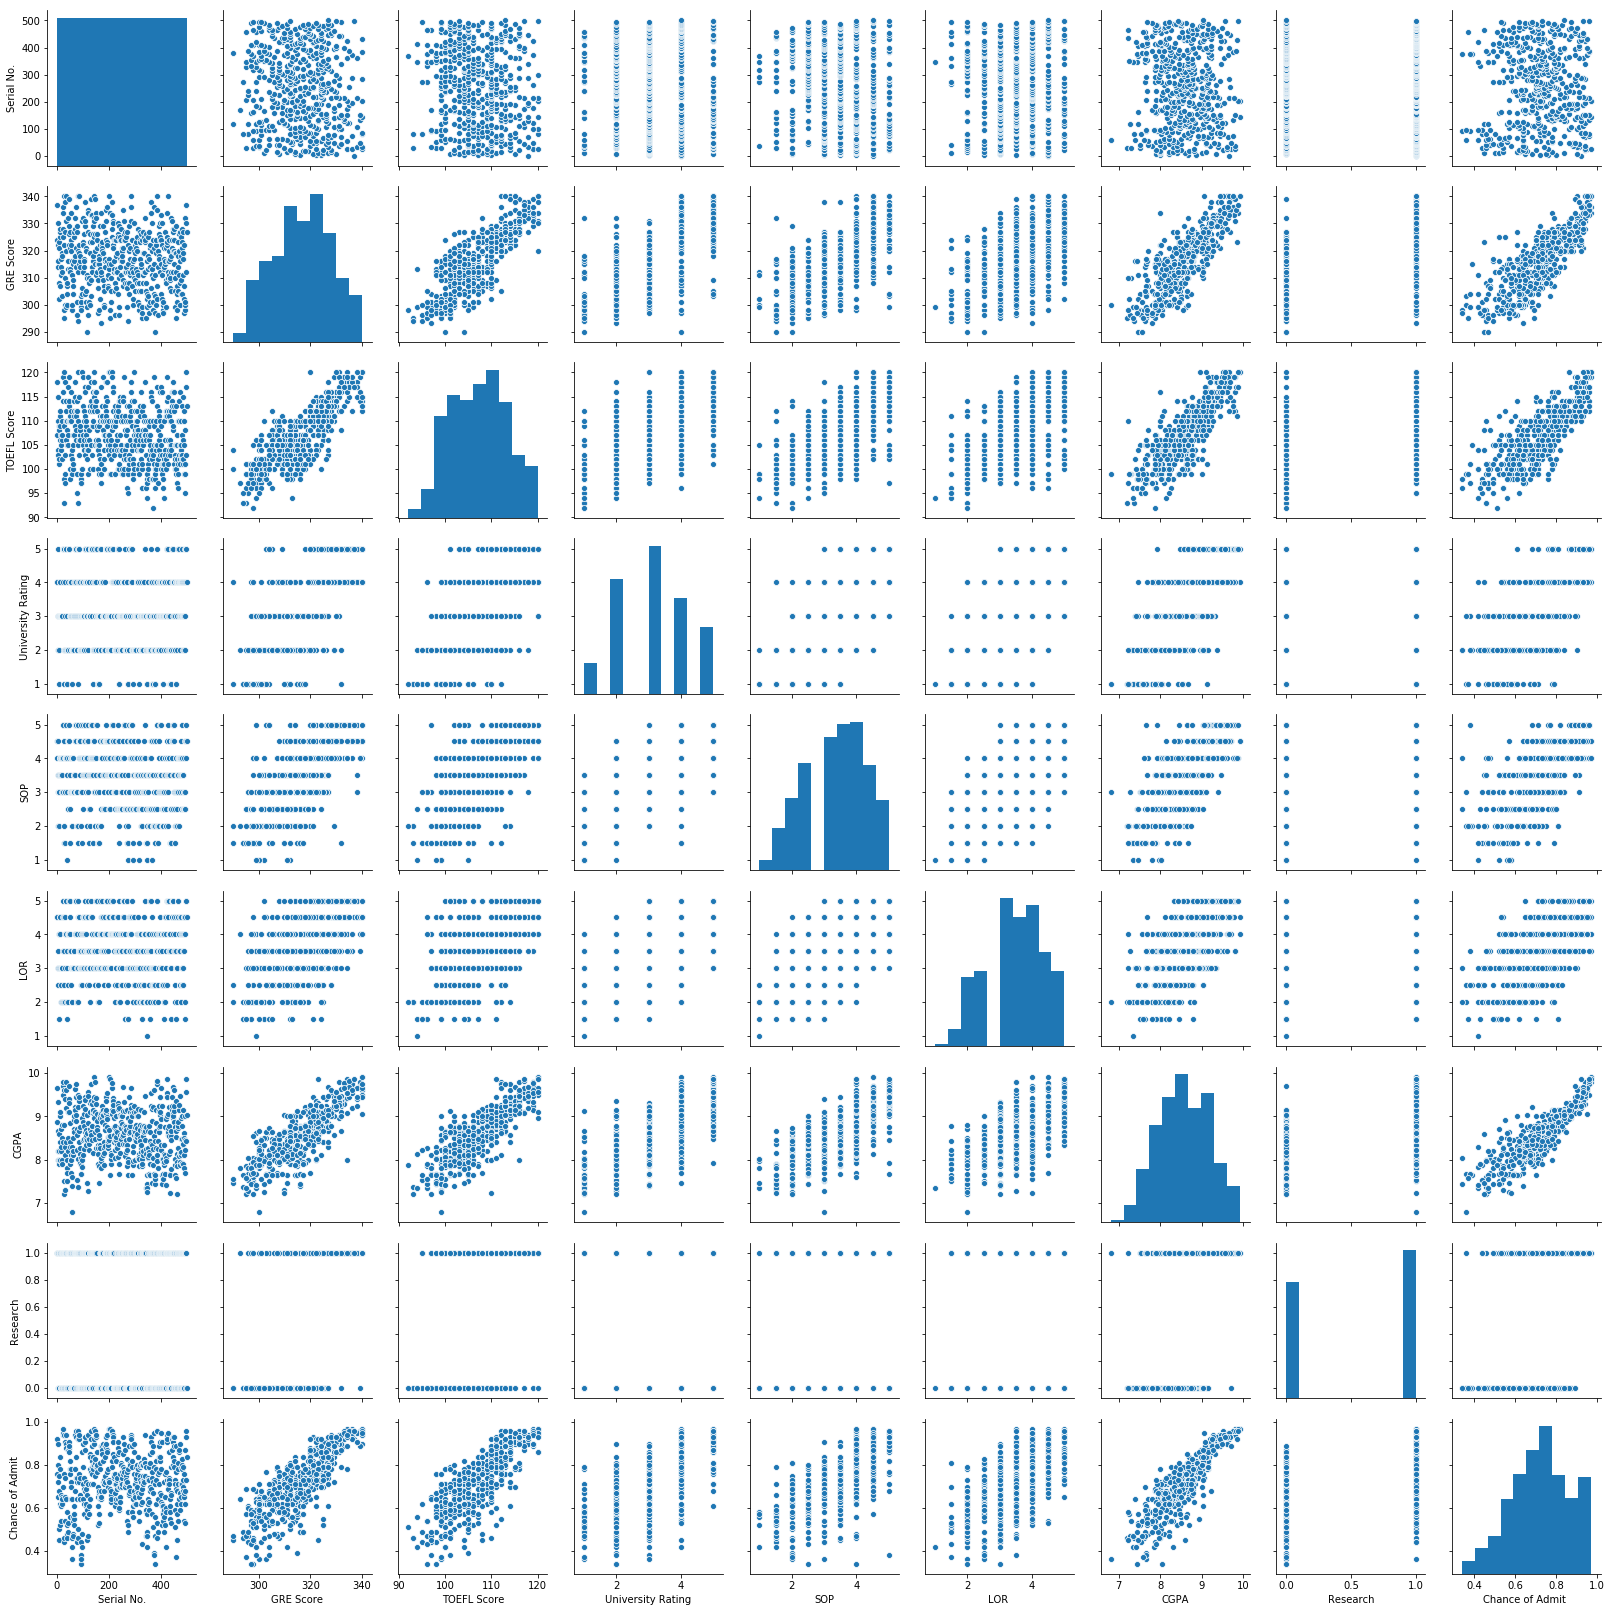

In [17]:
sn.pairplot(df)

In [18]:
cdf = df[["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "]]
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [19]:

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[["GRE Score", "TOEFL Score", "CGPA"]])
train_y = np.asanyarray(train[['Chance of Admit ']])

test_x = np.asanyarray(test[["GRE Score", "TOEFL Score", "CGPA"]])
test_y = np.asanyarray(test[['Chance of Admit ']])


In [20]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x_= regr.fit(train_x, train_y)
y_hat = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00237296 0.00283088 0.14578981]]
Intercept:  [-1.58366591]


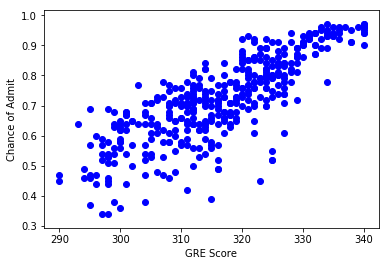

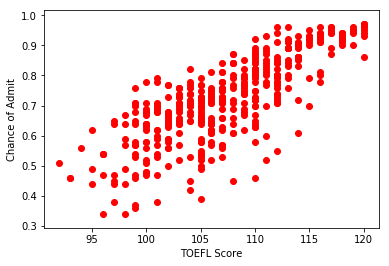

In [21]:
plt.scatter(train["GRE Score"], train['Chance of Admit '],  color='blue')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.figure()
plt.scatter(train["TOEFL Score"], train['Chance of Admit '],  color='red')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")

plt.show()



In [22]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )



Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.80


In [23]:
print(min(df["GRE Score"]))
print(max(df["GRE Score"]))

290
340


Coefficients:  [[ 0.00000000e+00 -2.01306622e-02  4.82956429e-05]]
Intercept:  [2.24774727]
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01
R2-score: 0.52


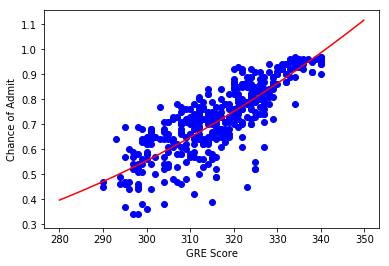

In [24]:
msk = np.random.rand(len(df)) < 0.8
train1 = cdf[msk]
test1 = cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x_train = np.asanyarray(train1[['GRE Score']])
y_train = np.asanyarray(train1[['Chance of Admit ']])

x_test = np.asanyarray(test1[['GRE Score']])
y_test = np.asanyarray(test1[['Chance of Admit ']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

plt.scatter(train["GRE Score"], train['Chance of Admit '],  color='blue')
XX = np.arange(280, 350,0.14)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(x_test)
test_y_1 = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_1 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_1 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_1 , y_test) )